# Are Fandango Movie Ratings Biased?

In 2015, Walt Hickey, a journalist, published an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) in which he compared Fandango and other movie rating systems (like Metacritic, IMDB, etc), and discovered that it was rounding up ratings like 4.1 to 4.5 and not 4.0 as we may expect. Interestingly, the data in HTML was correct but the rounding system had a minor bug which "*rounds up to the next highest half star instead of the nearest half star*" as stated by the company. Ratings can have heavy impact on the customer's behavior so the US Federal Trade Commission pays attention to different types of endorsements but even in this case we, as consumers, have to pay attention when choosing a product by ratings and to compare with them with other aggregation sites with attention.

In this project, we will analyze more recent movie data and figure out whether there were any changes in Fandango's rating system after Hickey's analysis. We will use two data sets: one made available by Walt Hickey on [GitHub](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) with the data he collected *before* the analysis and [one](https://github.com/mircealex/Movie_ratings_2016_17) containing the data collected by a DataQuest team member in 2016-2017 (so *after* the changes in the rating system should have been introduced). The latter dataset was used to write an article titled [Whose ratings should you trust? IMDB, Rotten Tomatoes, Metacritic, or Fandango?](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/).

## Read in and Explore the Data

First of all, let's read in and explore the datasets. In this step, we have to find out if the samples represent a random collection of movies. For example, if we collected only Action movies, that would be a selection bias since we concentrate our attention on only a part of the whole story.

In his article, Walt Hickey says that he pulled 510 films that were released in 2015 but **only 209 films with 30+ reviews were analyzed**. The sample is pretty big and it also fair to include only the films that were popular enough since these films will generate the most revenue and thus their ratings are critical for their success. However, when comparing with other rating systems, Hicket restricted the sample to 146 samples since not all movies from Fandango had scores on IMDb or Metacritic. The number of reviews (30+) is high enough to conclude that the rating is meaningful. Despite the fact that the sample is big, it was not collected randomly (the author selected **only** the movies with 30+ reviews that had sales in 2015) so it may not be representative of the entire population of movies.

The second dataset contains 214 most popular movies in 2016 and the beginning of 2017. The author, Alex Olteanu, is aware that "*working with a small sample is risky*" but says that "*this is compensated by getting the most recent snapshot of the ratings’ distributions*". Interestingly, Alex Olteanu discovered that even after fixing the bug on Fandango **ratings are still heavily skewed towards high scores** when compared to other rating systems. Also, this data set was not collected randomly: it contains only the most popular movies released in 2016-2017.

In both cases, the authors used the technique called "[purposive sampling](https://research-methodology.net/sampling-in-primary-data-collection/purposive-sampling/)" that relies on the judgment of the researcher when collecting the data.

At this point, we have to slightly change the goal of the analysis and instead of figuring out whether there was a change in the Fandango rating system (for which we would need samples collected using random sampling), we will **compare the ratings of the most popular movies in 2015 and 2016** which should be a good roxy for the initial goal.

We will consider a movie "popular" using Hickey's benchmark so the movies must have at least 30 reviews. Thus, let's read in the data, have a quick look at it, and check whether the collected data passes the 30-reviews benchmark.

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("white")

# Disable warnings (there are not critical ones)
import warnings
warnings.filterwarnings('ignore')

# Read in the datasets
fandango_2015 = pd.read_csv("data/fandango_score_comparison.csv")
ratings_16_17 = pd.read_csv("data/movie_ratings_16_17.csv")

# Select relevant columns
fandango_2015 = fandango_2015[
    [
        "FILM",
        "Fandango_Stars",
        "Fandango_Ratingvalue",
        "Fandango_votes",
        "Fandango_Difference",
    ]
]
ratings_16_17 = ratings_16_17[["movie", "year", "fandango"]]

# Show the datasets
display(fandango_2015.head())
display(ratings_16_17.head())

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [2]:
# Check the minimum number of votes in the fandango_2015 dataset
print(
    f"The minimum number of votes given to a movie in fandango_2015: {fandango_2015['Fandango_votes'].min()}"
)

The minimum number of votes given to a movie in fandango_2015: 35


The first data set passes the benchmark but for the second one, the number of votes for each film is not available. We can get a random sample and manually check the data on the Fandango website but unfortunately, no data is available on their website. Even a search on Kaggle did not produce any result. However, let's assume that the data pulling was correct and most films had at least 30 fan votes. We can also refer to the [DataQuest notebook](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb) that confirms our assumption.

In [3]:
# Random sample
ratings_16_17.sample(10, random_state=2)

,movie,year,fandango
23,Bitter Harvest,2017,4.5
155,Table 19,2017,3.0
207,Whiskey Tango Foxtrot,2016,3.5
13,Arsenal,2017,3.5
64,Gold,2016,3.5
131,Pele: Birth of a Legened,2016,4.5
141,Sausage Party,2016,3.5
193,The Secret Life of Pets,2016,4.0
93,Kung Fu Panda 3,2016,4.5
30,Cafe Society,2016,3.5


As you may have noticed from the random sample, some movies were not released only in 2016 but also at the beginning of 2017 (indeed, the data set was updated in late March 2017). Let's also explore the first data set and check the years. Our end goal is to isolate the movies released **only** in 2015 and 2016 in two separate data sets.

In [4]:
fandango_2015.sample(10, random_state=2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
91,Paddington (2015),4.5,4.3,4045,0.2
126,Woman in Gold (2015),4.5,4.4,2435,0.1
3,Do You Believe? (2015),5.0,4.5,1793,0.5
35,The Loft (2015),4.0,3.6,811,0.4
123,Magic Mike XXL (2015),4.5,4.4,9363,0.1
82,Blackhat (2015),3.0,2.8,1430,0.2
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
12,Leviathan (2014),4.0,3.5,64,0.5
42,About Elly (2015),4.0,3.6,43,0.4
125,The Wedding Ringer (2015),4.5,4.4,6506,0.1


*Leviathan* was released in 2014 so we have to isolate the movies released in 2015.

In [5]:
#  Isolate movies released in 2015 and 2016
movies_2015 = fandango_2015[fandango_2015["FILM"].str.contains("2015")]
movies_2016 = ratings_16_17[ratings_16_17["year"] == 2016]

We did not dramatically shorten the data sets by isolating only relevant movies so we can go on with the analysis.

### Summary Statistics

Before diving into the analysis, it is always a good idea to perform some EDA or **exploratory data analysis**. We can use the simple function `.describe()` to numerically summarize the data.

In [6]:
display(movies_2015.describe())
display(movies_2016.describe())

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,129.000000,129.000000,129.000000,129.000000
mean,4.085271,3.846512,3761.891473,0.238760
std,0.538096,0.505446,6543.601748,0.152741
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,210.000000,0.100000
50%,4.000000,3.900000,1415.000000,0.200000
75%,4.500000,4.200000,4045.000000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


,year,fandango
count,191.0,191.000000
mean,2016.0,3.887435
std,0.0,0.509540
min,2016.0,2.500000
25%,2016.0,3.500000
50%,2016.0,4.000000
75%,2016.0,4.250000
max,2016.0,5.000000


The mean rating value in 2016 dropped by around 0.2 points that may be the consequence of the changes made on the website. Also, the 75th percentile is 0.25 less in the 2016 data set than in the 2015 data set.

### Data Distibution: Boxplots

It's also a good idea to compare the rating columns in the data sets using boxplots.

Text(-1.9, 5.2, 'Rating distributions in 2015 and 2016')

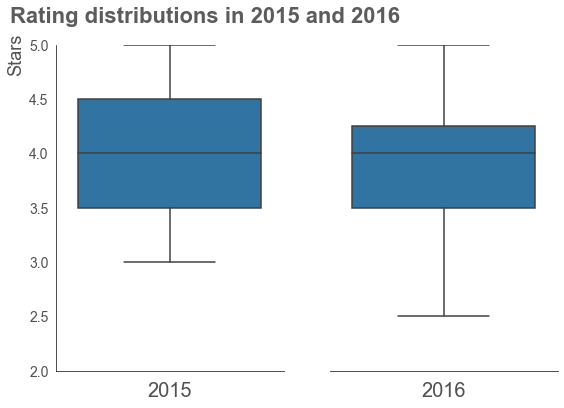

In [7]:
# Fonts for titles and subtitles

# Font for titles
font_title = {"size": 22, "weight": "bold", "alpha": 0.75}

# Font for subtitles
font_subtitle = {"size": 16, "alpha": 0.85}

# Draw boxplots
fig, ax = plt.subplots(1, 2, figsize=(9, 6))
sns.boxplot(y="Fandango_Stars", data=movies_2015, ax=ax[0])
sns.boxplot(y="fandango", data=movies_2016, ax=ax[1])

# Remove right and top spines
sns.despine()

# Set y limits
ax[0].set_ylim(2, 5)
ax[1].set_ylim(2, 5)

# Remove left label
ax[1].set_ylabel("")

# Remove x axis from the  right plot
ax[1].get_yaxis().set_ticks([])
ax[1].spines["left"].set_visible(False)

# Change y axis lable and ticks location and size
ax[0].set_ylabel("Stars", fontsize=18, x=0, y=0.97, alpha=0.8)
ax[0].set_yticklabels(np.arange(2, 5.5, 0.5), fontsize=14, alpha=0.8)

# Set x labels to distinguish between 2015 and 2016
ax[0].set_xlabel(xlabel="2015", fontsize=20, alpha=0.8)
ax[1].set_xlabel(xlabel="2016", fontsize=20, alpha=0.8)

# TItle
plt.text(s="Rating distributions in 2015 and 2016", x=-1.9, y=5.2, fontdict=font_title)

There is no evident difference between the two boxplots. The medians are the same but the 2016  distribution seems to tend towards lower values. The difference is only subtle and we should better see the difference on kernel density plots (KDE).

### KDE Plots

In [8]:
movies_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


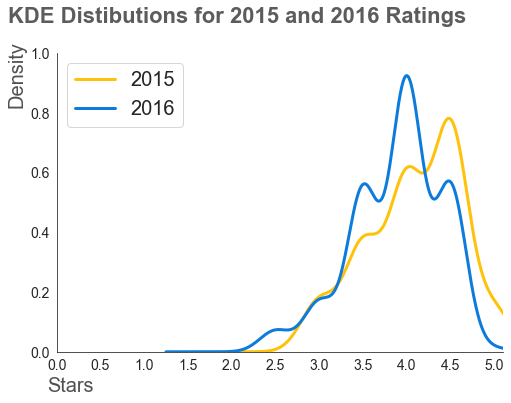

In [9]:
movies_2015["Fandango_Stars"].plot.kde(
    label="2015", color="#FFC20A", legend=True, linewidth=3
)
movies_2016["fandango"].plot.kde(
    label="2016", color="#0C7BDC", legend=True, figsize=(8, 5.5), linewidth=3
)


# Decrease the number of ticks
plt.xlim(0, 5.1)
plt.xticks(np.arange(0, 5.1, 0.5))

# Set y limits
plt.ylim(0, 1)

# Remove the top and right spines
sns.despine()

# Set x and y labels, customize the format and position
plt.xlabel(xlabel="Stars", fontsize=20, alpha=0.8, x=0.03, y=1)
plt.ylabel(ylabel="Density", fontsize=20, alpha=0.8, x=0, y=0.93)
plt.tick_params(axis="both", labelsize=14)

# Title
plt.text(
    s="KDE Distibutions for 2015 and 2016 Ratings", x=-0.55, y=1.1, fontdict=font_title
)

# Place legend on the left and increase the font size
plt.legend(loc="upper left", prop={"size": 20})

On the figure above, we can observe that:

1. Both plots are left-skewed, so are shifter towards high ratings which is suspectful since Fandango sells tickets
2. It's clear that the 2015 ratings were more shifted towards higher values compared to 2015, hence there is a good chance that there were some changes in the Fandango rating system between 2015 and 2016

### Frequency Tables and Statistics

In this section, we will try to get more granular information from the dataset by comparing rating frequency distribution tables. Since the dataframes have a different number of movies, it makes more sense to compare the relative frequency (in percentages) of each rating and to visualize these distibtuions using a grouped bar chart.

In [10]:
# Raing frequncy tables with percentage
frequency_2015 = movies_2015["Fandango_Stars"].value_counts(normalize=True)
frequency_2016 = movies_2016["fandango"].value_counts(normalize=True)
print(f"The rating frequency table of 2015 movies: \n{frequency_2015 * 100}")
print()
print(f"The rating frequency table of 2016 movies: \n{frequency_2016 * 100}")

The rating frequency table of 2015 movies: 
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

The rating frequency table of 2016 movies: 
4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64


The most frequent rating among 2015 films is 4.5 that account for 38% of all ratings in 2015 while in 2016 this rating reached only 25% that confirms our observation from the KDE plots: the 2015 distribution is shifted towards high values. However, the *direction* of two of the table difference is not very clear so we can compute three different statistics to figure it out:

* Mean
* Median
* Mode

In [11]:
# 2015 statistics
mean_2015 = movies_2015["Fandango_Stars"].mean()
median_2015 = movies_2015["Fandango_Stars"].median()
mode_2015 = movies_2015["Fandango_Stars"].mode().iloc[0]

# 2016 statistics
mean_2016 = movies_2016["fandango"].mean()
median_2016 = movies_2016["fandango"].median()
mode_2016 = movies_2016["fandango"].mode().iloc[0]

# Create a summary dataframe
summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["Mean", "Median", "Mode"]
summary["Difference"] = summary["2015"] - summary["2016"]
summary

,2015,2016,Difference
Mean,4.085271,3.887435,0.197837
Median,4.000000,4.000000,0.000000
Mode,4.500000,4.000000,0.500000


The direction of the difference is clearer now:
* The rating mean in the 2016 data set is lower by 0.2
* The mode in the 2016 data set is 4.0 while in 2015 it was 4.5
* Interestingly, the median remained the same

Let's also visualize these statistics to have a better understanding of the differences.

Text(-0.63, 5.35, 'Statistics Comparison: 2015 vs 2016')

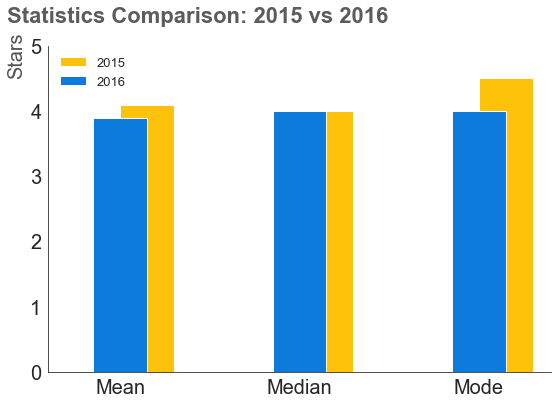

In [12]:
# Plots
fig, ax = plt.subplots(figsize=(9, 6))
summary["2015"].plot.bar(label="2015", align="edge", color="#FFC20A", width=0.30)
summary["2016"].plot.bar(label="2016", align="center", color="#0C7BDC", width=0.30)

# Customize ticks
plt.tick_params(which="both", labelsize=20)
plt.xticks(rotation=0, ha="center")

# y limit
plt.ylim(0, 5)

# Despine
sns.despine()

# Customize legend
plt.legend(loc="upper left", frameon=False, prop={"size": 13})

# y lable
plt.ylabel(ylabel="Stars", fontsize=20, alpha=0.8, x=0, y=0.97)

# TItle
plt.text(s="Statistics Comparison: 2015 vs 2016", x=-0.63, y=5.35, fontdict=font_title)

## Conclusions 

In this project, we investigated whether there were changes in the Fandango rating system that would round up all ratings independently of how low their decimals are. We used the *purposive sampling* to compare two the ratings in 2015 (before the changes) and 2016 (after the hypothetical changes) and found out that indeed the ratings in 2016 were shifted less to higher ratings than in 2015. However, they were still very high and this may be suspectful since Fandango sells cinema tickets and may have commercial interests in high ratings.

The article ["Whose ratings should you trust? IMDB, Rotten Tomatoes, Metacritic, or Fandango?"](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/) tells us that the best website to know if a movie is worth watching is Metacritic but I'd advise to also check as many websites as you can and do not rush to a cinema as soon as a new movie is released but to use the word of mouth to figure out if it's worth your money.